# Online shoppers intention

## Table of contents
* [EDA](#eda-exploratory-data-analysis)
* [Machine Learning](#machine-learning)
    * [Optimize hyperparameters with GridSearchCV](#optimize)   
* [Model evaluation](#evaluation)
    * [Confusion Matrix](#cmatrix)
    * [Precision-Recall curve](#pr-curve)
* [Over-sampling with SMOTE](#smote)
* [Conclusion](#conclusion)

# EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression            
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

df = pd.read_csv('online_shoppers_intention.csv')

In [2]:
# A climpse of how the dataframe 
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Get a picture of data type for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Descriptive statistic for the numberical features
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Check for null values
df.isnull().sum().sum()

0

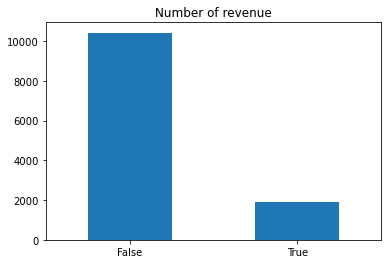

In [6]:
# Check the class balance that I will predict later
df['Revenue'].value_counts().plot(kind='bar',rot=0)
plt.title('Number of revenue')
plt.show()

The classes is imbalanced. This is something that should be taken into account later when creating a predictive model.

For now let's continue with exploring the data.

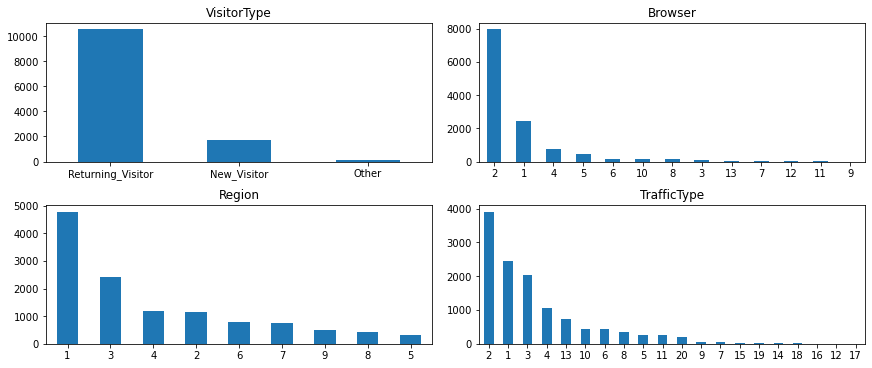

In [7]:
figure, axes = plt.subplots(2,2, figsize=(12,5),constrained_layout=True)
df['VisitorType'].value_counts().plot(kind='bar',ax=axes[0][0],title='VisitorType',rot=0)
df['Browser'].value_counts().plot(kind='bar',ax=axes[0][1],title='Browser',rot=0)
df['Region'].value_counts().plot(kind='bar',ax=axes[1][0],title='Region',rot=0)
df['TrafficType'].value_counts().plot(kind='bar',ax=axes[1][1],title='TrafficType',rot=0)
plt.show()

From the four plots, one can see that each feature has some class/types that are more dominating than the others. 

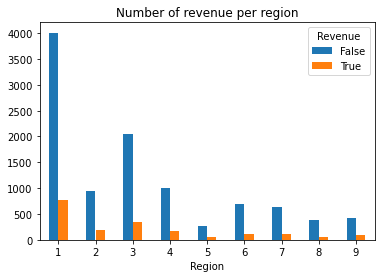

In [8]:
df.groupby(['Region','Revenue'])['SpecialDay'].count().unstack().plot(kind='bar',title='Number of revenue per region',rot=0)

plt.show()

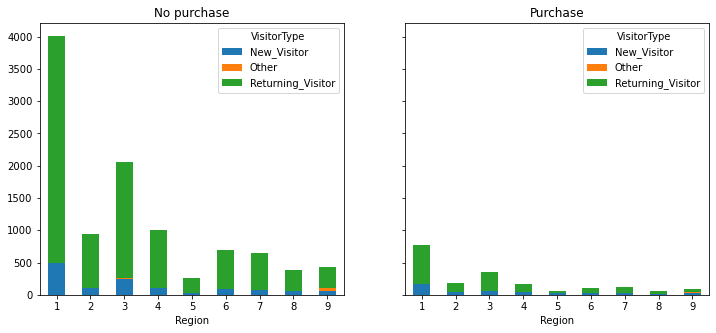

In [9]:
df_unstacked = df.groupby(['Region','Revenue','VisitorType'])['SpecialDay'].count().unstack()
df2 = df_unstacked.reset_index(level='Revenue', col_level=1)
df_false = df2.iloc[::2,:]
df_true = df2.iloc[1::2,:]
figure, axes = plt.subplots(1,2,figsize=(12,5),sharey=True)
df_false.plot(kind='bar',stacked=True, ax=axes[0],title='No purchase',rot=0)
df_true.plot(kind='bar',stacked=True, ax=axes[1],title='Purchase',rot=0)
plt.show()

Regions 1 and 3 have more visitors than the other regions. Higher number of visitors correlate with more purchase for these two regions. For the other regions the number of visitors is less and so are the number of purchases.

<b>Recommendation 1 for increasing number of visitors:</b> Increase marketing to increase the number of visitors or improve the SEO on the site.

<b>Recommendation 2 for increasing number of purchase:</b> Maybe the site needs some change. Try different styles and use A/B tests to verify.

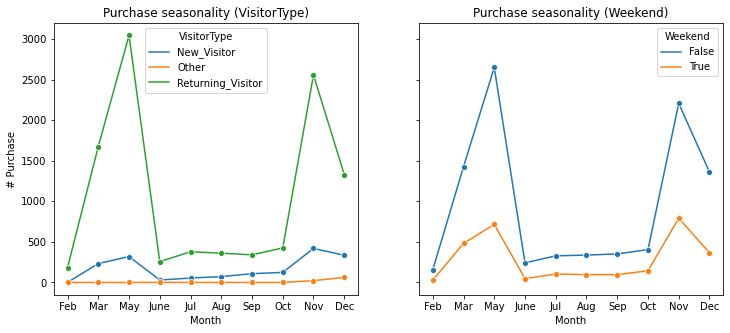

In [10]:
# Make Month column to categorical for sorting later
df['Month'] = pd.Categorical(df['Month'],categories=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],ordered=True)

df_rev_weekend = df.groupby(['Month','Weekend'])['Revenue'].count().reset_index()
df_rev_weekend = df_rev_weekend.sort_values(by='Month',ascending=False)

df_rev_visitortype =df.groupby(['Month','VisitorType'])['Revenue'].count().reset_index()
df_rev_weekend = df_rev_weekend.sort_values(by='Month',ascending=False)
df_rev_visitortype.rename(columns={'Revenue':'# Purchase'},inplace=True)
df_rev_weekend.rename(columns={'Revenue':'# Purchase'},inplace=True)

figure,axes=plt.subplots(1,2,sharey=True,figsize=(12,5))
sns.lineplot(x='Month',y='# Purchase',data=df_rev_visitortype,hue='VisitorType',marker='o',ax=axes[0])
axes[0].set_title('Purchase seasonality (VisitorType)')
sns.lineplot(x='Month',y='# Purchase',data=df_rev_weekend,hue='Weekend',marker='o',ax=axes[1])
axes[1].set_title('Purchase seasonality (Weekend)')


plt.show()

It looks like the homepage have some difficulties to increase a higher conversion rate after a higher revenue period. From the data it is unclear how big each purchase (amount of money spent on each purchase) is before and after a high revenue activity. Let's assume the the purchase is the same as before high revenue activity.

<b>Recommendation 3 for increasing conversion rate:</b> Create a loyalty program for the customers. Try to reach out to the customers with newsletter via email or text messages.

In [ ]:
df_unstack_traffic = df.groupby(['TrafficType','Revenue'])['Month'].count().unstack()
df_unstack_traffic = df_unstack_traffic.fillna(0)
df_unstack_traffic.columns.name ='Purchase'

df_unstack_browser = df.groupby(['Browser','Revenue'])['Month'].count().unstack()
df_unstack_browser = df_unstack_browser.fillna(0)
df_unstack_browser.columns.name ='Purchase'

figure,axes=plt.subplots(1,2,figsize=(12,5),sharey =True)

df_unstack_browser.plot(kind='bar',ax=axes[0],rot=0)
axes[0].set_title('Number of purchase per browser type')

df_unstack_traffic.plot(kind='bar',ax=axes[1],rot=0)
axes[1].set_title('Number of purchase per traffic type')
plt.show()


It is clear that some browser and traffic types are more dominating when it comes to what customers use. 

<b>Recommendation:</b> Depending on the buisness situation, try to increase the visitors and then conversion rate on the browser and traffic type that have very low numbers or focus more on the types that is generating money already.

In [ ]:
# Change categorical variables to numerical for machine learning models

df['VisitorType'] = df['VisitorType'].map({'New_Visitor':0, 'Returning_Visitor':1,'Other':3})
df['Weekend'] = df['Weekend'].map({False:0, True:1})
df['Revenue']= df['Revenue'].map({False:0, True:1})
df['Month'] = df['Month'].map({'Feb':1,'Mar':2,'May':3,'June':4,'Jul':5,'Aug':6,'Sep':7,'Oct':8,'Nov':9,'Dec':10})

In [ ]:
#df.head()

## Machine Learning 
## Using Logistic regression and support vector machine models

In [14]:
lr = LogisticRegression(max_iter=10000)
svc = svm.SVC()
X = df.iloc[:,:-1].values
y = df.iloc[:,-1]
kfold = KFold(n_splits=5, shuffle=False)
print('Logistic Regression')
print(cross_val_score(lr, X, y, cv=kfold,scoring='roc_auc'))
print('\nSupport vector machine')
print(cross_val_score(svc, X, y, cv=kfold,scoring='roc_auc'))

[0.95900661 0.96019382 0.84862168 0.83772122 0.84564777]

Support vector machine
[0.95159041 0.97518738 0.82988211 0.76189448 0.7211908 ]


The scores for logistic regression and support vector machine model were performed with cross-validation to have a quick look on how well each model performed. Scoring <i>roc_auc</i> were used due to imbalance in the data set. It appears that SVM has a higher variation in the scores and it is lower than logistic regression scores. Let's try to optimize the model by tuning the hyperparameters with GridSearchsCV.

## Optimize hyperparameter with GridSearchCV<a id='optimize'></a>

In [15]:
lr = LogisticRegression(max_iter=10000)
svc = svm.SVC()

param_lr = {'C':[0.001, 0.01, 0.1, 1, 10]}

param_svc = {'C':[0.001, 0.1, 1, 10],
             'gamma': [0.001, 0.1, 1, 10]}

svc_grid = GridSearchCV(svc,
                        param_svc, 
                        cv=5, 
                        scoring='roc_auc')

lr_grid = GridSearchCV(lr,
                       param_lr, 
                       cv=5, 
                       scoring='roc_auc')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svc_grid.fit(X_train,y_train)
lr_grid.fit(X_train,y_train)

print('Best logistic regression cross-validation score: ',lr_grid.best_score_)
print('Logistic Regression best param: ',lr_grid.best_params_)
print('Best support vector machine cross-validation score:',svc_grid.best_score_)
print('Support vector best param:',svc_grid.best_params_)

Best logistic regression cross-validation score:  0.89933761712086
Logistic Regression best param:  {'C': 0.001}
Best support vector machine cross-validation score: 0.8401370970532641
Support vector best param: {'C': 0.1, 'gamma': 0.001}


### Model Evaluation<a id='evaluation'></a>

In [16]:
lr = LogisticRegression(max_iter=10000,**lr_grid.best_params_)
svc = svm.SVC(**svc_grid.best_params_)
lr.fit(X_train,y_train)
svc.fit(X_train,y_train)
print('score lr: ',lr.score(X_test,y_test))
print('score svc: ',svc.score(X_test,y_test))

score lr:  0.8780751554474182
score svc:  0.8448229251148959


The accuracy score is better for logistic regression. However, data set is imbalanced which makes <i>accuracy score</i> not a good evaluation metrics. Instead of accuracy score, confusion matrix and precision-recall are better metrics to evaluate imbalance data set.

### Confusion matrix<a id='cmatrix'></a>

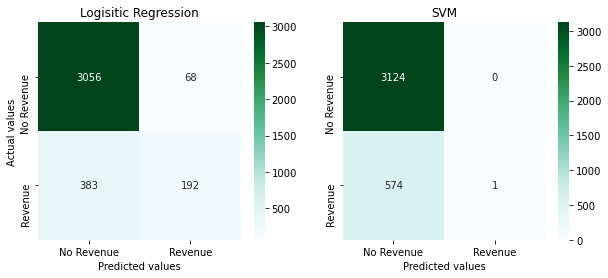

In [17]:

y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)

fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test,y_pred_lr),
            annot=True,
            fmt="d",
            cmap="BuGn",
            xticklabels=['No Revenue','Revenue'],
            yticklabels=['No Revenue','Revenue'],
            ax=axes[0])

sns.heatmap(confusion_matrix(y_test,y_pred_svc),
            annot=True,
            fmt="d",
            cmap="BuGn",
            xticklabels=['No Revenue','Revenue'],
            yticklabels=['No Revenue','Revenue'],
            ax=axes[1])

axes[0].set_xlabel('Predicted values')
axes[0].set_title('Logisitic Regression')
axes[0].set_ylabel('Actual values')
axes[1].set_title('SVM')
axes[1].set_xlabel('Predicted values')
plt.show()

Following insight can be drawn from the confusion matrcies:

###### Logisitc Regression model
*  The cases when there were no revenue and the model actually predicted no revenue is 3056.This is also known as <b>True Negatives (TN)</b>


*  The cases when there were revenue and the model actually predicted  revenue is 192.This is also known as <b>True Positives (TP)</b>


*  The case when there were no revenue and the model actually predicted revenue is 68.This is also known as <b>False Positives (FP)</b>


*  The case when there were revenue and the model actually predicted no revenue is 383.This is also known as <b>False Negatives (FN)</b>



###### SVM model
*  The cases when there were no revenue and the model actually predicted no revenue is 3124.This is also known as <b>True Negatives (TN)</b>


*  The cases when there were revenue and the model actually predicted  revenue is 1.This is also known as <b>True Positives (TP)</b>


*  The case when there were no revenue and the model actually predicted revenue is 0.This is also known as <b>False Positives (FP)</b>


*  The case when there were revenue and the model actually predicted no revenue is 574.This is also known as <b>False Negatives (FN)</b>

Following metrics can be determined from the values in a confusion matrix:

$$
Precision
=
\frac{TP }{TP+FP}
$$

$$
Recall 
=
\frac{TP}{TP+FN}
$$

$$
Accuracy 
=
\frac{TP+TN}{TP+TN+FP+FN}
$$

$$
F1-score 
=
\frac{2*Precision*Recall}{Precision+Recall}
$$



|   |   |   |   |   
|---|---|---|---|
||<b>Logisitc Regression model</b>|<b>SVM model</b>|
|Accuracy|0.88|0.84|
|Precision|0.74|1|
|Recall|0.33|0.001|
|F1-score|0.46|0.0018|


The accuracy for respectively model is the same as we saw earlier. The models looks quite good based on these values, however, as mentioned earlier the data set is imbalanced. This cause the model to calculate the accuracy on the dominating class (No revenue). 

Recall and precision are better metrics for these kind of data sets. The recall for logisitc regression and SVM are 0.33 and 0.001 respectively. This means that 33% of the purchased (revenue) customers were correctly identified with <b>logistic regression</b> model and 0.1% with <b>SVM</b> model. A low recall for this data set means that the model have difficulties to identify customers who have purhcased. The precision for logisitc regression and SVM are 0.74 and 1 respectively. This means that 74% of the customers who did not purchase (no revenue) were correctly identified for <b>logistic regression</b> model and 100% with <b>SVM</b> model. 


F1-score is good measure to get a full picture instead of just looking at precision and recall. F1-score ranges from 0 to 1 where 1 is perfect precision and recall.

### Precision-Recall curve<a id='pr-curve'></a>

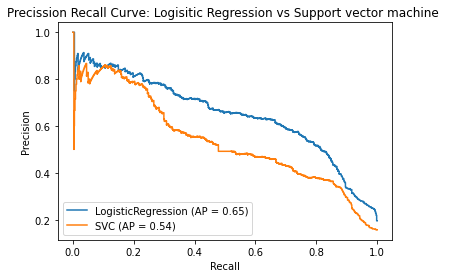

In [18]:
plot_precision_recall_curve(lr,X_test, y_test,ax = plt.gca())
plot_precision_recall_curve(svc,X_test, y_test,ax = plt.gca())
plt.title('Precission Recall Curve: Logisitic Regression vs Support vector machine ')
plt.show()

Precision-Recall curve tells us the trade-off between these two parameters. A good model should be as close as possible to the top right corner. From the curves one can see that if we want a high recall we have to sacriface precision, especially for a recall of 85 or more.

In [19]:
print('Logisitc Regression: ')
print(classification_report(y_test,y_pred_lr,target_names=['No Revenue','Revenue']))
print('\nSupport vector machine: ')
print(classification_report(y_test,y_pred_svc,target_names=['No Revenue','Revenue']))

Logisitc Regression: 
              precision    recall  f1-score   support

  No Revenue       0.89      0.98      0.93      3124
     Revenue       0.74      0.33      0.46       575

    accuracy                           0.88      3699
   macro avg       0.81      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699


Support vector machine: 
              precision    recall  f1-score   support

  No Revenue       0.84      1.00      0.92      3124
     Revenue       1.00      0.00      0.00       575

    accuracy                           0.84      3699
   macro avg       0.92      0.50      0.46      3699
weighted avg       0.87      0.84      0.77      3699



Classification reports of the two models show a more comprehensive summary of all the mentioned metrics for respectively classes. The row <i>Revenue</i> for respectively model are the same values as in table above. 

The models are not good at predicting an unbalanced model. On method is to over-sample the minority class with SMOTE(Synthetic Minority Oversampling Technique). What will happen is that minority class will be duplicated and become equal to the majority class. This will be performed for rain and test data and then fit to our machine learning models. 

## Over-sampling with SMOTE <a id='smote'></a>

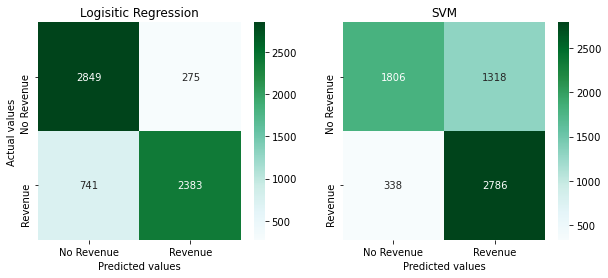

In [20]:
oversample = SMOTE(sampling_strategy='minority',random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)
lr_model_smote = LogisticRegression(max_iter=10000,**lr_grid.best_params_)
svc_model_smote = svm.SVC(**svc_grid.best_params_)
lr_model_smote.fit(X_train,y_train)
svc_model_smote.fit(X_train,y_train)
X_test, y_test = oversample.fit_resample(X_test, y_test)

y_pred_lr = lr_model_smote.predict(X_test)
y_pred_svc = svc_model_smote.predict(X_test)

fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test,y_pred_lr),
            annot=True,
            fmt="d",
            cmap="BuGn",
            xticklabels=['No Revenue','Revenue'],
            yticklabels=['No Revenue','Revenue'],
            ax=axes[0])
axes[0].set_xlabel('Predicted values')
sns.heatmap(confusion_matrix(y_test,y_pred_svc),
            annot=True,
            fmt="d",
            cmap="BuGn",
            xticklabels=['No Revenue','Revenue'],
            yticklabels=['No Revenue','Revenue'],
            ax=axes[1])
axes[0].set_title('Logisitic Regression')
axes[1].set_title('SVM')
axes[1].set_xlabel('Predicted values')
axes[0].set_ylabel('Actual values')
plt.show()

 The <b>True positive</b> (2377 for logistic regression and 2890 for SVM) is now much higher for respectively confusion matrix which means that the recall is also higher. 

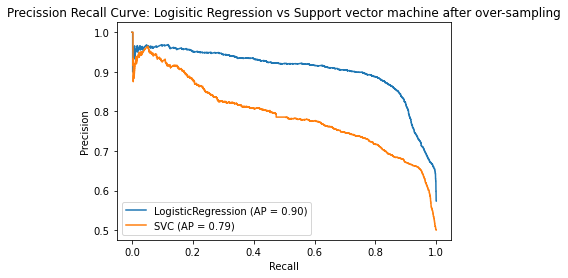

In [21]:
plot_precision_recall_curve(lr_model_smote,X_test, y_test,ax = plt.gca())
plot_precision_recall_curve(svc_model_smote,X_test, y_test,ax = plt.gca())
plt.title('Precission Recall Curve: Logisitic Regression vs Support vector machine after over-sampling')
plt.show()

The precision-recall curve is better for the both models compared to the imbalanced one now. The logistic regression model is more stable because of precision is fairly stable until around 85. 

In [22]:
print('Logistic Regression:')
print(classification_report(y_test,y_pred_lr,target_names=['No Revenue','Revenue']))
print('\nSupport vector machine:')
print(classification_report(y_test,y_pred_svc,target_names=['No Revenue','Revenue']))

Logistic Regression:
              precision    recall  f1-score   support

  No Revenue       0.79      0.91      0.85      3124
     Revenue       0.90      0.76      0.82      3124

    accuracy                           0.84      6248
   macro avg       0.85      0.84      0.84      6248
weighted avg       0.85      0.84      0.84      6248


Support vector machine:
              precision    recall  f1-score   support

  No Revenue       0.84      0.58      0.69      3124
     Revenue       0.68      0.89      0.77      3124

    accuracy                           0.73      6248
   macro avg       0.76      0.73      0.73      6248
weighted avg       0.76      0.73      0.73      6248



The classification reports  show much better values now after balancing the classes. Overall the Logisitc regression model performs better based on the F1-score.

# Conclusion<a id='conclusion'></a>


*   In this project data analysis has been performed to get a better insight and recommendation have been suggested to improve conversion and retention. 
*   Two machine learning models were performed to predict purchase or not
*   Different metrics where used to show how to evaluate an imbalance data set
*   SMOTE were used to balance the data set. Result shows that logistic regression is a better model for prediction